## Importing Header Files

In [626]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.0)
sns.set_style("whitegrid")  # Choose a style that suits your aesthetics

In [627]:
import warnings
warnings.filterwarnings('ignore')

## Data Import and Understanding

In [628]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [629]:
df = pd.read_csv('/content/drive/MyDrive/PROJECTS DATABASE/Admission_Predict_Ver1.1.csv')

In [630]:
df.shape

(500, 9)

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


* __No missing values present in data__

In [632]:
#Taking a look at the dataset values for a basic understanding
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [633]:
# Checking the numerical features spread of the data
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


__Observation:__
* Average GRE Score :316.47 out of 340
* Average TOEFL Score:107.19 out of 120
* Average CGPA:8.58 out of 10
* Average chance of admission : 72.17%

## Feature Engineering

In [634]:
#Since serial no is a identification feature, so it is not required for modelling hence dropping it from the dataframe
df = df.drop("Serial No.", axis = 1)

In [635]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [636]:
# Remove leading and trailing spaces from column names
df = df.rename(columns=lambda x: x.strip())

#### Defining target variable w.r.t Classification model by taking chances of admit > 80% as positive and rest as negative

In [637]:
df['Grad Admission'] = np.where(df['Chance of Admit'] >= 0.80, 1, 0)
#Dropping the original column
df = df.drop('Chance of Admit', axis = 1)

In [638]:
#A look at the modified dataset
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Grad Admission
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


## Exploratory Data Analysis

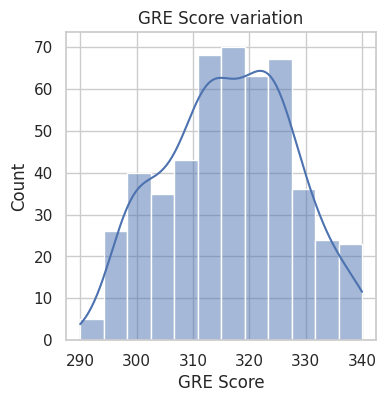

In [639]:
plt.figure(figsize=(4,4))
sns.histplot(x='GRE Score', data=df, kde=True)
plt.title('GRE Score variation')
plt.show()

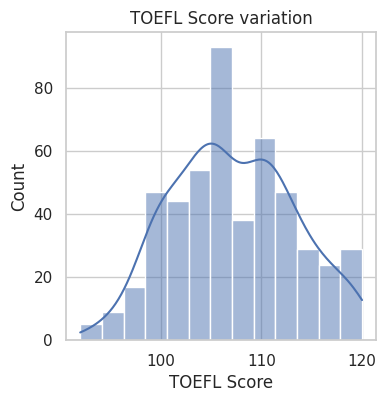

In [640]:
plt.figure(figsize=(4,4))
sns.histplot(x='TOEFL Score', data=df, kde=True)
plt.title('TOEFL Score variation')
plt.show()

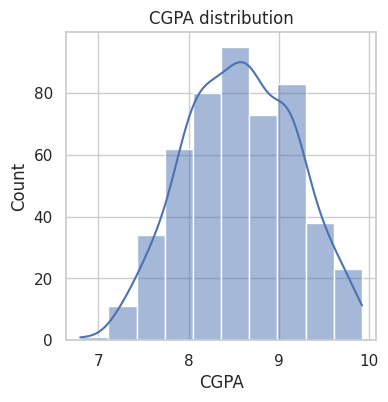

In [641]:
plt.figure(figsize=(4,4))
sns.histplot(x='CGPA', data=df, bins=10, kde=True)
plt.title('CGPA distribution')
plt.show()

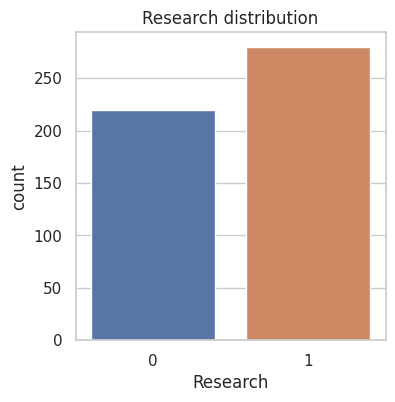

In [642]:
plt.figure(figsize=(4,4))
sns.countplot(x='Research', data=df)
plt.title('Research distribution')
plt.show()

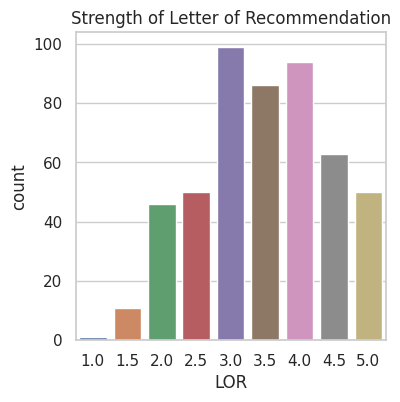

In [643]:
plt.figure(figsize=(4,4))
sns.countplot(x='LOR', data=df)
plt.title('Strength of Letter of Recommendation')
plt.show()

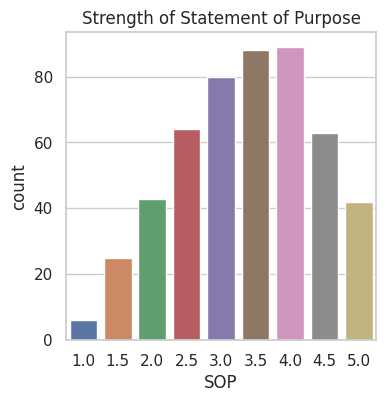

In [644]:
plt.figure(figsize=(4,4))
sns.countplot(x='SOP', data=df)
plt.title('Strength of Statement of Purpose')
plt.show()

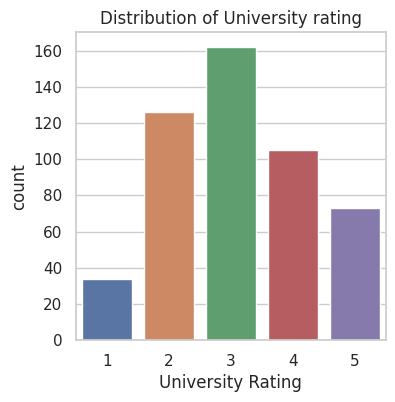

In [645]:
# Bar plot for a categorical column
plt.figure(figsize=(4,4))
sns.countplot(x='University Rating', data=df)
plt.title('Distribution of University rating')
plt.show()

## Impact of Features on target variable(Admission Chances)

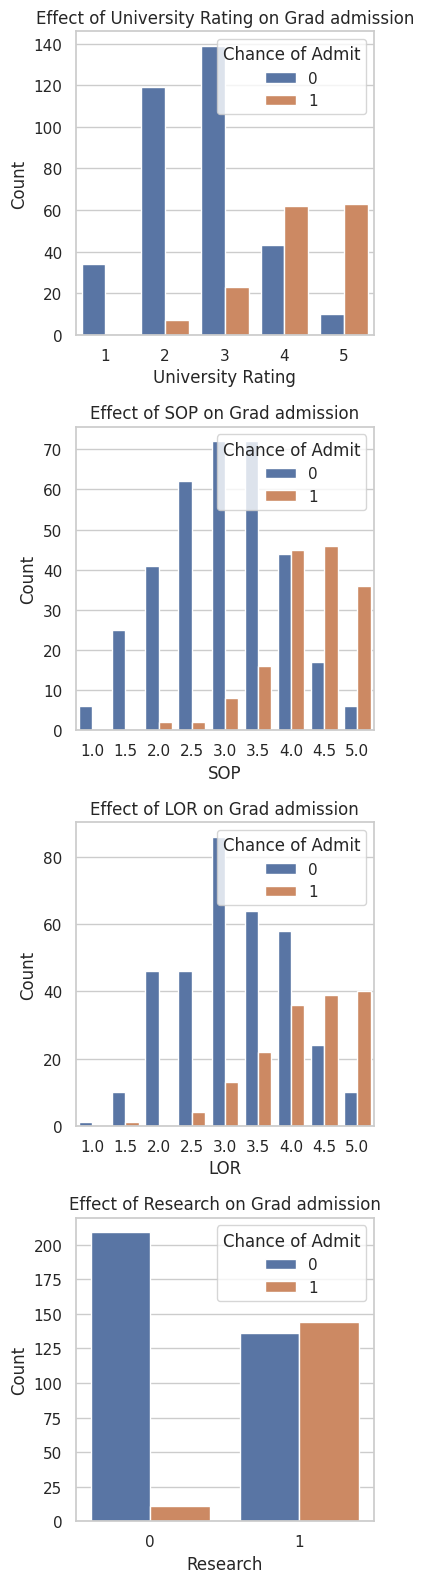

In [646]:
# Univariate Analysis
# Assuming 'cat_features' is a list containing the names of all categorical features in the DataFrame
cat_features = ['University Rating', 'SOP', 'LOR', 'Research']

# Set up the subplot layout
fig, axes = plt.subplots(nrows=len(cat_features), ncols=1, figsize=(4, len(cat_features)*4))

# Create bar plots for each categorical feature
for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue='Grad Admission', data=df, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Effect of {feature} on Grad admission')
    axes[i].legend(title='Chance of Admit', loc='upper right')

plt.tight_layout()
plt.show()


__Observation:__
   
   > 1. University Ratings of 3 or more have better chances of admission.
   
   > 2. The strength of both SOP and LOR should be on the higher side with a minimum of 3 and especially 4+ to have good chances of admission.
   
   > 3. The candidates having some research work in their bacground have better chances of admission.
    

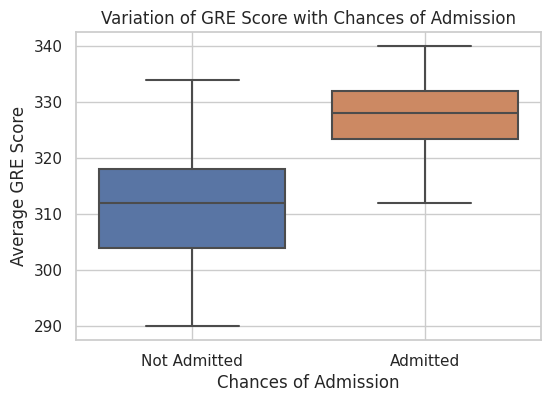

In [647]:
#Impact of Numerical Features on the target variable
plt.figure(figsize=(6,4))
sns.boxplot(x='Grad Admission', y='GRE Score', data=df)
plt.title('Variation of GRE Score with Chances of Admission')
plt.xlabel('Chances of Admission')
plt.ylabel('Average GRE Score')
plt.xticks([0, 1], ['Not Admitted', 'Admitted'])
plt.grid(True)
plt.show()

__Higher GRE scores positiely impacts the chances of admission, especially scores above 320 have very good chances.__

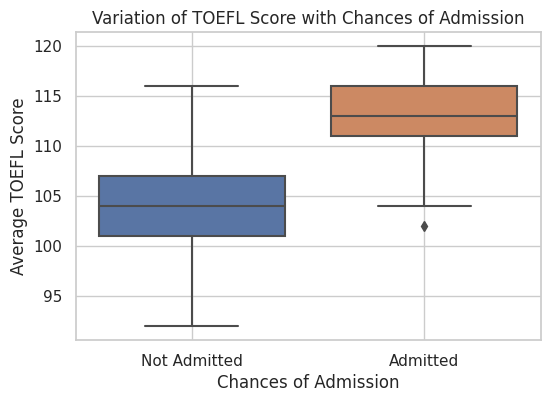

In [648]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Grad Admission', y='TOEFL Score', data=df)
plt.title('Variation of TOEFL Score with Chances of Admission')
plt.xlabel('Chances of Admission')
plt.ylabel('Average TOEFL Score')
plt.xticks([0, 1], ['Not Admitted', 'Admitted'])
plt.grid(True)
plt.show()

__Higher TOEFL scores also boosts up the chances of admission, scores of 110+ have very good chances.__

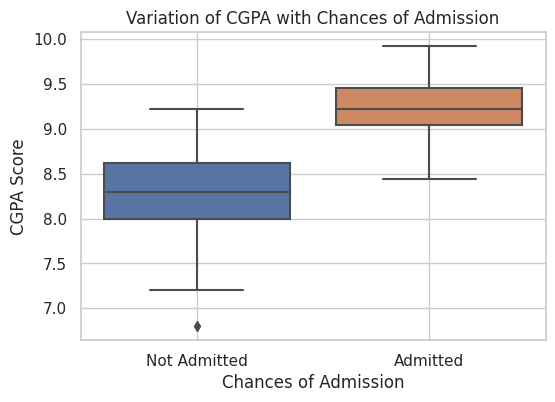

In [649]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Grad Admission', y='CGPA', data=df)
plt.title('Variation of CGPA with Chances of Admission')
plt.xlabel('Chances of Admission')
plt.ylabel('CGPA Score')
plt.xticks([0, 1], ['Not Admitted', 'Admitted'])
plt.grid(True)
plt.show()

__CGPA score also plays important role in determining chances of admission, CGPA score of 9+ are very good from the admission perspective.__

### Multivariate Analysis

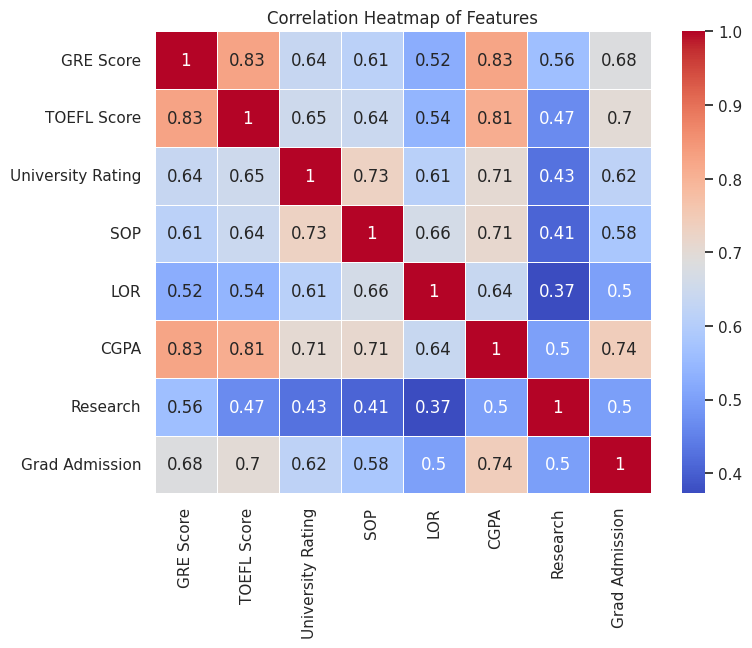

In [650]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

> * __We can clearly conclude that CGPA, GRE & TOEFL scores are highly correlated which is also understandable from the general trends, a student who is very good tends to get good scores in all.__
> * __Chances of admission is also correlated with CGPA, GRE & TOEFL scores.__
> * __Universities ratings is also somewhat correlated with CGPA and SOP.__

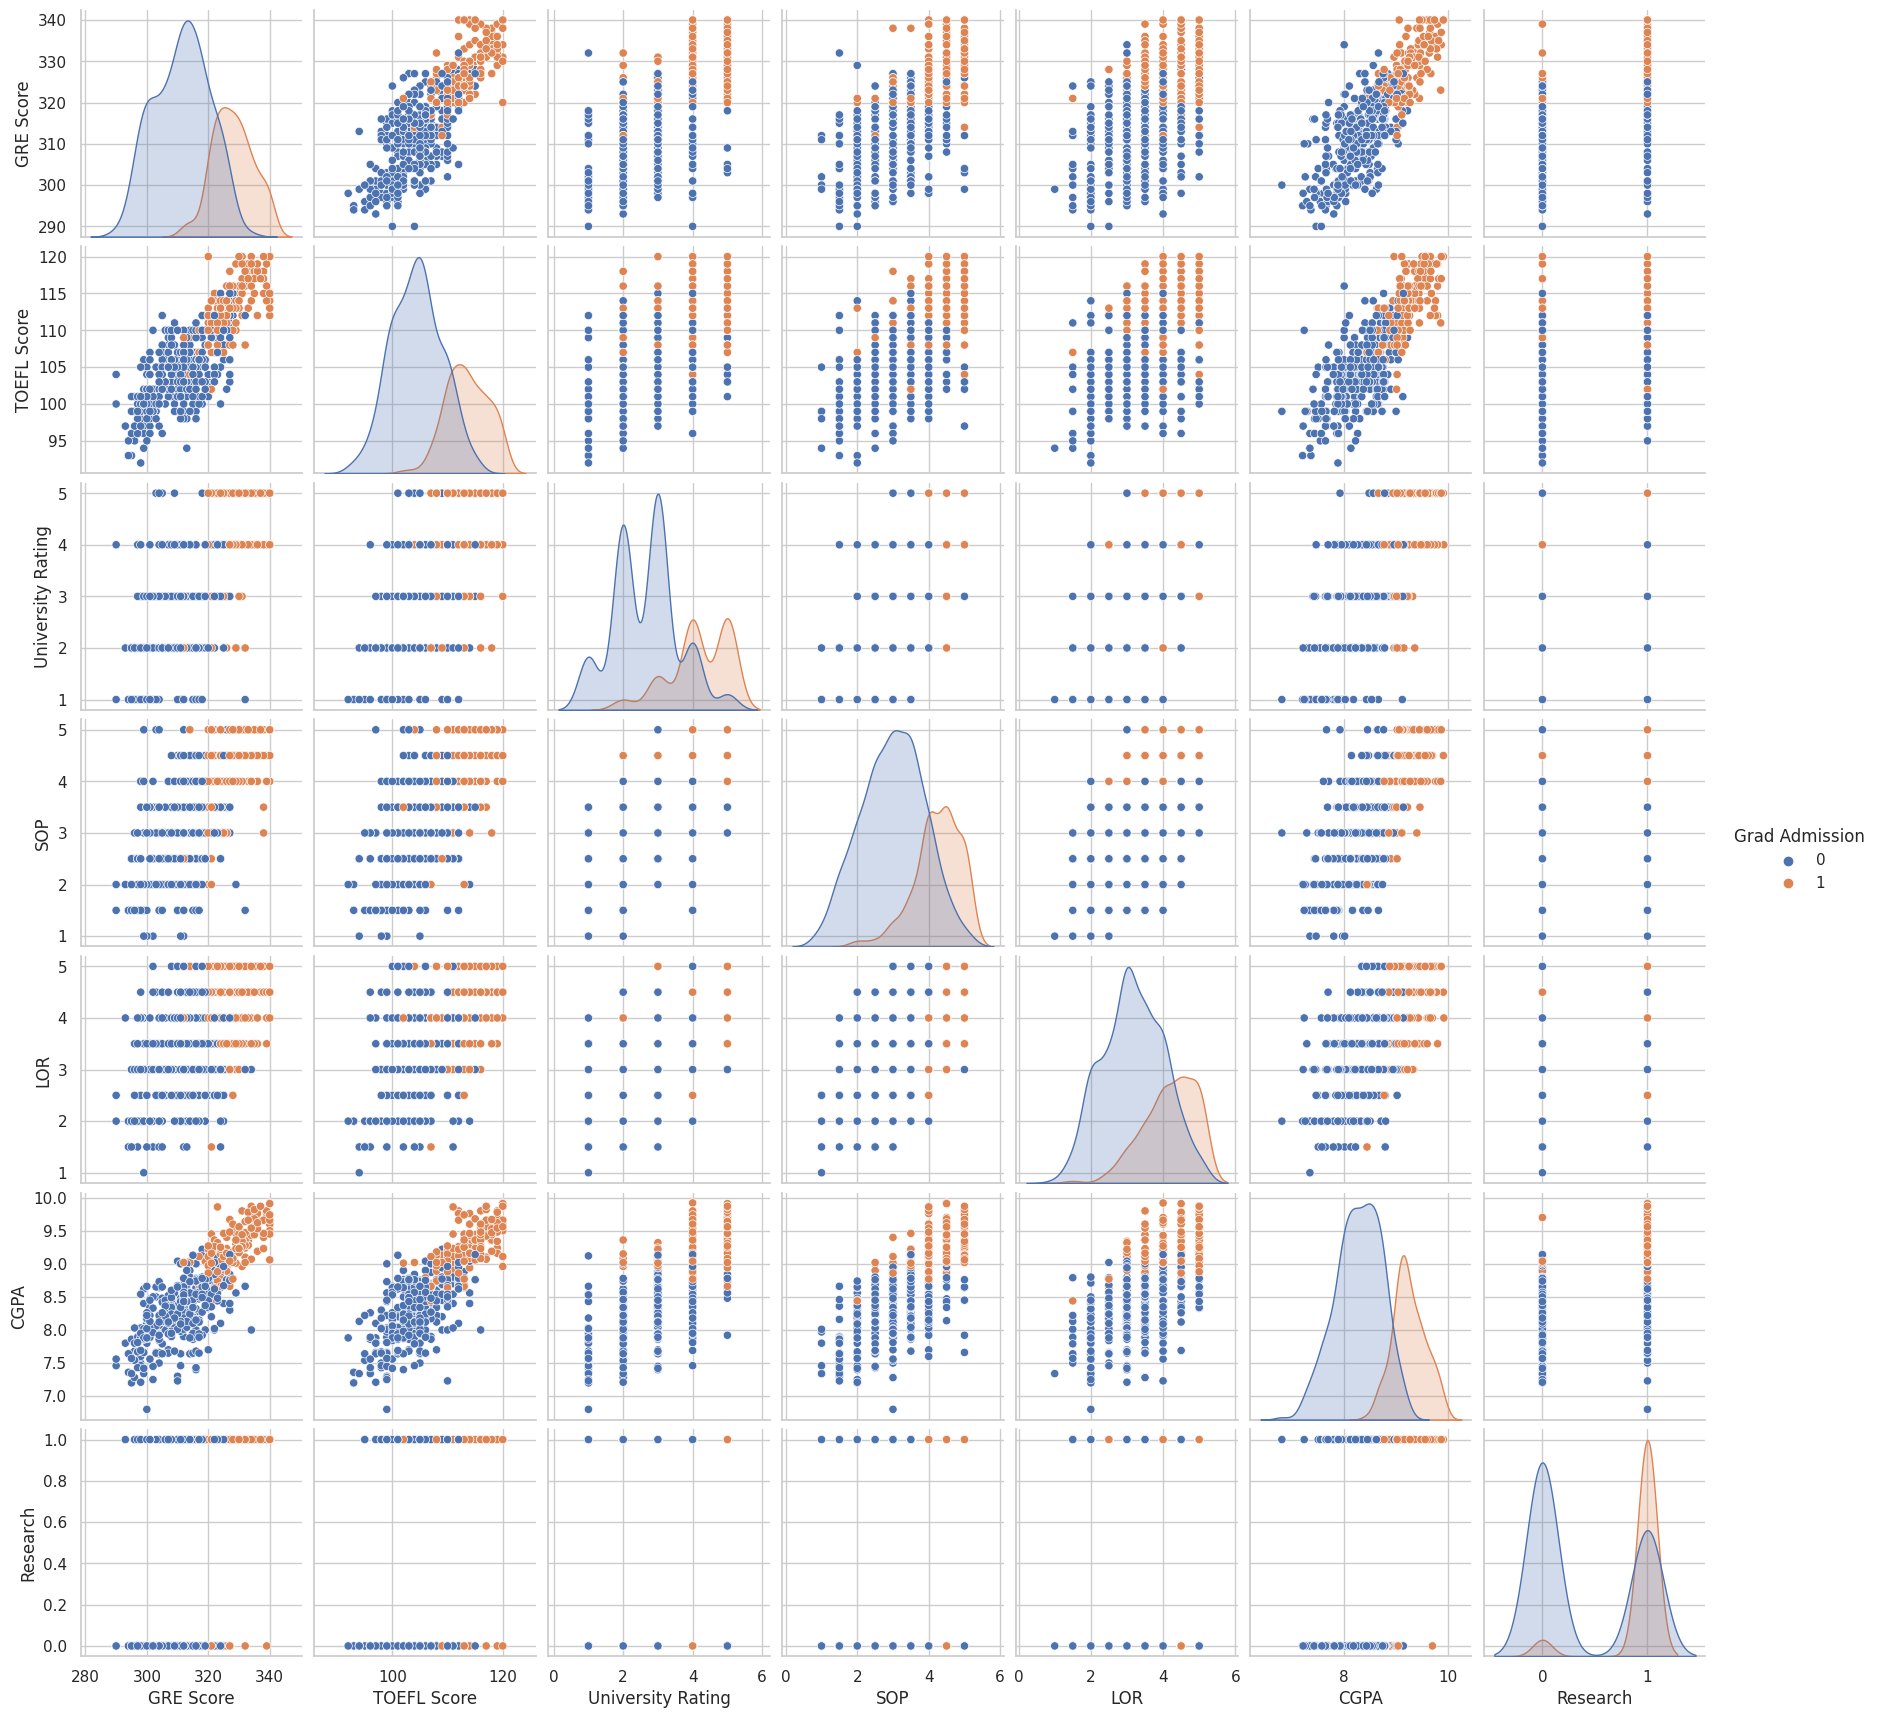

In [651]:
sns.pairplot(df,hue='Grad Admission')

* Students from universities with higher ratings tend to get higher CGPA scores and good SOP and LOR.

## Feature Selection

In [652]:
#Separating target and features
y = df.pop('Grad Admission')
x = df

In [653]:
y.shape

(500,)

In [654]:
x.shape

(500, 7)

#Since the features are highly correlated, so using PCA technique
* _PCA is a dimensionality reduction technique that can be used to transform the original correlated features into a new set of uncorrelated features called principal components. This can help in reducing the multicollinearity while retaining the most important information. However, interpreting the transformed features might be less intuitive._

In [655]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Initialize PCA with the desired number of components
num_components = 7 # Adjust this to the number of components equal to test set
pca = PCA(n_components=num_components)

# Fit PCA on the scaled data
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Variance explained by each component
explained_variance = pca.explained_variance_
print("Explained Variance:", explained_variance)

# Access the principal components themselves
principal_components = pca.components_
print("Principal Components:\n", principal_components)


Explained Variance Ratio: [0.67519343 0.10596446 0.08023255 0.0543379  0.03766808 0.02546844
 0.02113513]
Explained Variance: [4.73582567 0.74323771 0.56275335 0.38112753 0.264205   0.17863639
 0.14824242]
Principal Components:
 [[-0.40361694 -0.40120339 -0.3834133  -0.38466158 -0.3471675  -0.42103736
  -0.28872336]
 [-0.27452263 -0.11081202  0.2497745   0.3434338   0.42602733 -0.01504455
  -0.74182095]
 [-0.36263743 -0.46108277  0.09291061  0.17312554  0.46450082 -0.24073704
   0.58615408]
 [-0.14482269 -0.12684268  0.64173368  0.32685429 -0.64859464 -0.13665843
   0.07022078]
 [ 0.04779188 -0.03008301  0.60698049 -0.76276584  0.21111694 -0.01945709
  -0.04031081]
 [-0.25090997  0.72652707  0.03207901  0.01981706  0.09562054 -0.62726591
   0.07193756]
 [ 0.73757122 -0.2632937   0.02642093  0.12279282  0.08846344 -0.59332137
  -0.10503789]]


In [656]:
X = X_pca

## Splitting into test and train

In [657]:
from sklearn.model_selection import train_test_split
#Let’s split X and y using Train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,train_size=0.8,random_state=100)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",Y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",Y_test.shape)

train size X :  (400, 7)
train size y :  (400,)
test size X :  (100, 7)
test size y :  (100,)


## Classification Modelling

#### Logistic Regression

In [658]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report, ConfusionMatrixDisplay

In [659]:
lr =LogisticRegression()
lr.fit(X_train,Y_train)
# Make predictions on both the training and testing data
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

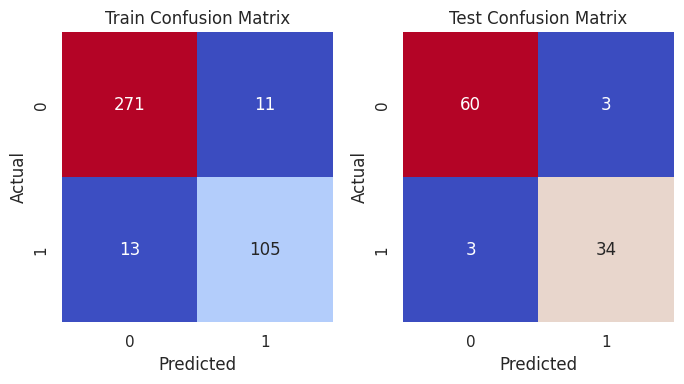

In [660]:
# Calculate confusion matrices for train and test sets
train_cm = confusion_matrix(Y_train,lr_train_pred )
test_cm = confusion_matrix(Y_test,lr_test_pred)

# Plot the confusion matrices side by side
plt.figure(figsize=(7,4))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [661]:
# Get classification reports for train and test sets
train_classification_report = classification_report(Y_train,lr_train_pred )
test_classification_report = classification_report(Y_test,lr_test_pred)


# Print classification reports side by side
print("Train Classification Report:\n", train_classification_report)
print("\nTest Classification Report:\n", test_classification_report)

Train Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       282
           1       0.91      0.89      0.90       118

    accuracy                           0.94       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.94      0.94      0.94       400


Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.92      0.92      0.92        37

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



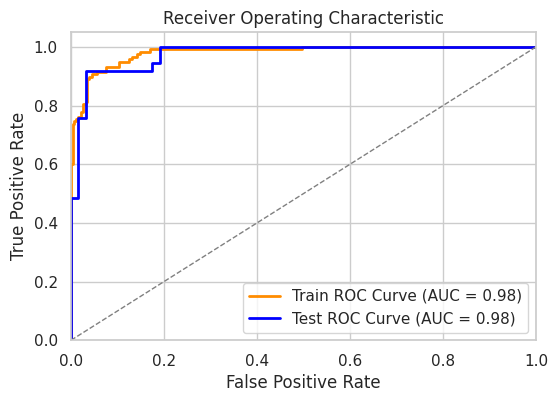

In [662]:
# Get predicted probabilities for both train and test sets
train_probs = lr.predict_proba(X_train)[:, 1]
test_probs = lr.predict_proba(X_test)[:, 1]

# Calculate ROC curve for both train and test sets
train_fpr, train_tpr, _ = roc_curve(Y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(Y_test, test_probs)

# Calculate AUC (Area Under the Curve) for both train and test ROC curves
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Plot ROC curves side by side
plt.figure(figsize=(6,4))
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f"Train ROC Curve (AUC = {train_auc:.2f})")
plt.plot(test_fpr, test_tpr, color='blue', lw=2, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#### KNN Classifier

Text(0, 0.5, 'Mean Error')

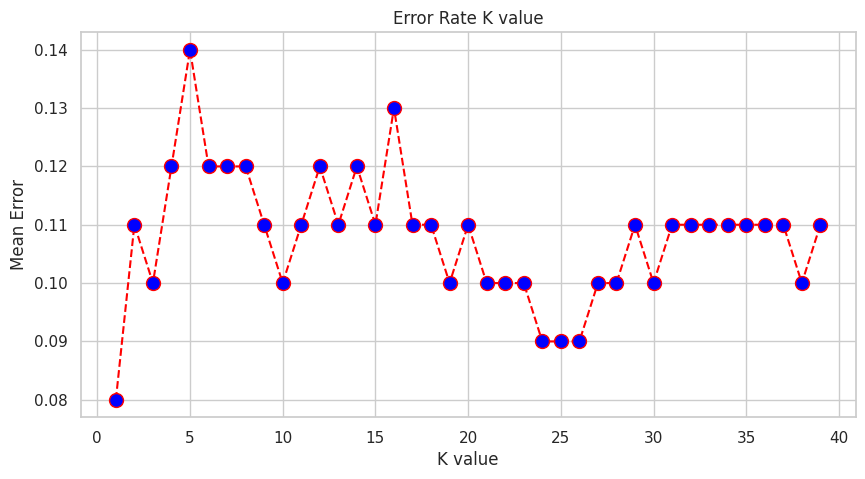

In [663]:
from sklearn.neighbors import KNeighborsClassifier
error = []
#Calculating error for K values between 1 to 40
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(10, 5))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [664]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, Y_train)
# Make predictions on both the training and testing data
KNN_train_pred = classifier.predict(X_train)
KNN_test_pred = classifier.predict(X_test)

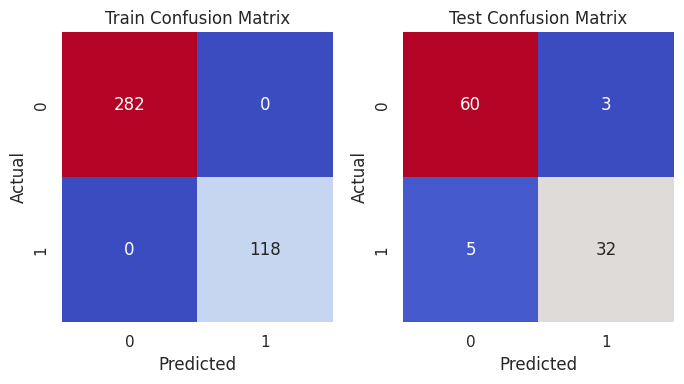

In [665]:
# Calculate confusion matrices for train and test sets
train_cm = confusion_matrix(Y_train,KNN_train_pred )
test_cm = confusion_matrix(Y_test,KNN_test_pred)

# Plot the confusion matrices side by side
plt.figure(figsize=(7,4))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [666]:
# Get classification reports for train and test sets
train_classification_report = classification_report(Y_train,KNN_train_pred )
test_classification_report = classification_report(Y_test,KNN_test_pred)

# Print classification reports side by side
print("Train Classification Report:\n", train_classification_report)
print("\nTest Classification Report:\n", test_classification_report)

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00       118

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94        63
           1       0.91      0.86      0.89        37

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



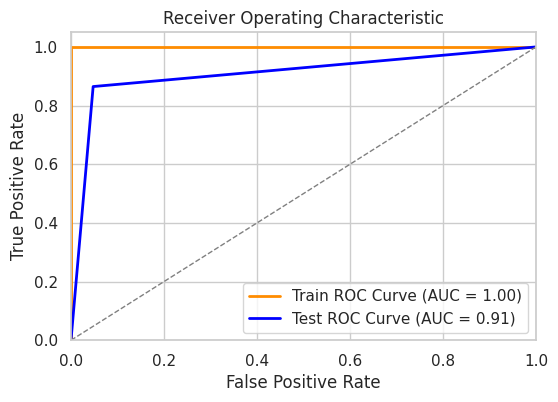

In [667]:
# Get predicted probabilities for both train and test sets
train_probs = classifier.predict_proba(X_train)[:, 1]
test_probs = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve for both train and test sets
train_fpr, train_tpr, _ = roc_curve(Y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(Y_test, test_probs)

# Calculate AUC (Area Under the Curve) for both train and test ROC curves
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Plot ROC curves side by side
plt.figure(figsize=(6,4))
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f"Train ROC Curve (AUC = {train_auc:.2f})")
plt.plot(test_fpr, test_tpr, color='blue', lw=2, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#### Random Forest Classifier

In [668]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
# Make predictions on both the training and testing data
rfc_train_pred = clf.predict(X_train)
rfc_test_pred = clf.predict(X_test)

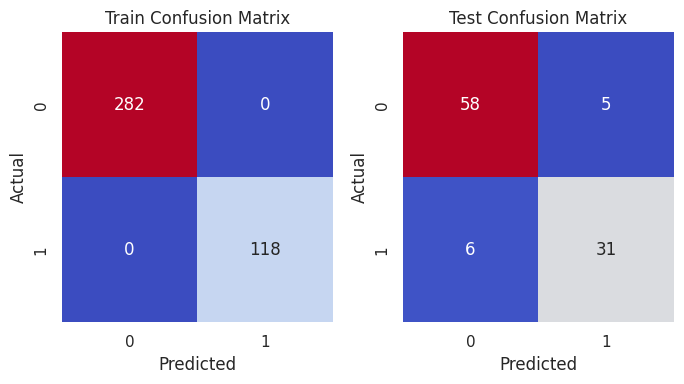

In [669]:
# Calculate confusion matrices for train and test sets
train_cm = confusion_matrix(Y_train,rfc_train_pred )
test_cm = confusion_matrix(Y_test,rfc_test_pred)

# Plot the confusion matrices side by side
plt.figure(figsize=(7,4))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [670]:
# Get classification reports for train and test sets
train_classification_report = classification_report(Y_train, rfc_train_pred)
test_classification_report = classification_report(Y_test, rfc_test_pred)

# Print classification reports side by side
print("Train Classification Report:\n", train_classification_report)
print("\nTest Classification Report:\n", test_classification_report)

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00       118

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Test Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91        63
           1       0.86      0.84      0.85        37

    accuracy                           0.89       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



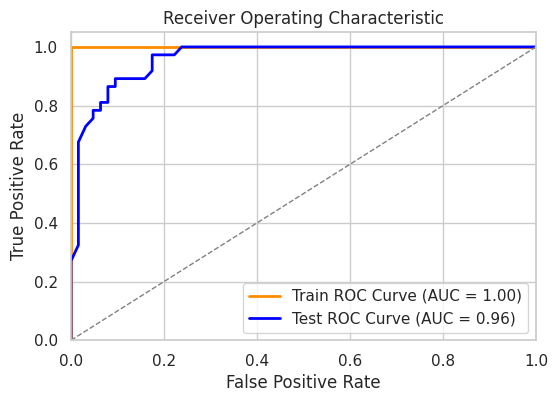

In [671]:
# Get predicted probabilities for both train and test sets
train_probs = clf.predict_proba(X_train)[:, 1]
test_probs = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve for both train and test sets
train_fpr, train_tpr, _ = roc_curve(Y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(Y_test, test_probs)

# Calculate AUC (Area Under the Curve) for both train and test ROC curves
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Plot ROC curves side by side
plt.figure(figsize=(6,4))
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f"Train ROC Curve (AUC = {train_auc:.2f})")
plt.plot(test_fpr, test_tpr, color='blue', lw=2, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#### XG Boost Classification

In [672]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb_model = XGBClassifier(
    learning_rate=0.1,  # Learning rate (default is 0.3)
    n_estimators=100,   # Number of boosting rounds (trees)
    max_depth=3,        # Maximum depth of each tree
    random_state=42     # Random seed for reproducibility
)

In [673]:
# Train the model
xgb_model.fit(X_train, Y_train)

# Make predictions on both the training and testing data
xgb_train_predictions = xgb_model.predict(X_train)
xgb_test_predictions = xgb_model.predict(X_test)

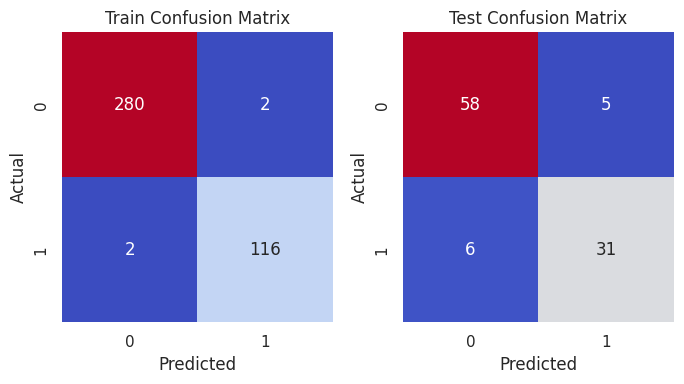

In [674]:
# Calculate confusion matrices for train and test sets
train_cm = confusion_matrix(Y_train, xgb_train_predictions)
test_cm = confusion_matrix(Y_test, xgb_test_predictions)

# Plot the confusion matrices side by side
plt.figure(figsize=(7,4))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [675]:
# Get classification reports for train and test sets
train_classification_report = classification_report(Y_train, xgb_train_predictions)
test_classification_report = classification_report(Y_test, xgb_test_predictions)

# Print classification reports side by side
print("Train Classification Report:\n", train_classification_report)
print("\nTest Classification Report:\n", test_classification_report)

Train Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       282
           1       0.98      0.98      0.98       118

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Test Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91        63
           1       0.86      0.84      0.85        37

    accuracy                           0.89       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



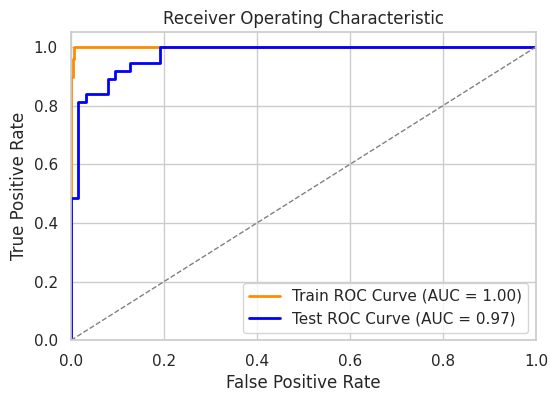

In [676]:
# Get predicted probabilities for both train and test sets
train_probs = xgb_model.predict_proba(X_train)[:, 1]
test_probs = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for both train and test sets
train_fpr, train_tpr, _ = roc_curve(Y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(Y_test, test_probs)

# Calculate AUC (Area Under the Curve) for both train and test ROC curves
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Plot ROC curves side by side
plt.figure(figsize=(6,4))
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f"Train ROC Curve (AUC = {train_auc:.2f})")
plt.plot(test_fpr, test_tpr, color='blue', lw=2, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#### Naive-Bayes Classifier

In [677]:
from sklearn.naive_bayes import GaussianNB
# Create a Naive Bayes classifier
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, Y_train)

# Make predictions on both the training and testing data
y_train_NB = naive_bayes_model.predict(X_train)
y_test_NB = naive_bayes_model.predict(X_test)

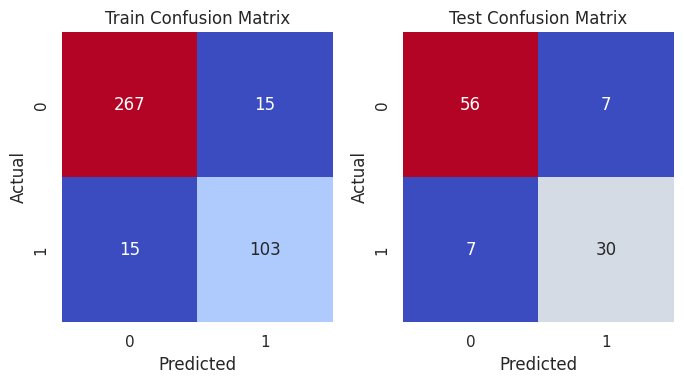

In [678]:
# Calculate confusion matrices for train and test sets
train_cm = confusion_matrix(Y_train, y_train_NB)
test_cm = confusion_matrix(Y_test, y_test_NB)

# Plot the confusion matrices side by side
plt.figure(figsize=(7,4))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [679]:
# Get classification reports for train and test sets
train_classification_report = classification_report(Y_train, y_train_NB)
test_classification_report = classification_report(Y_test, y_test_NB)

# Print classification reports side by side
print("Train Classification Report:\n", train_classification_report)
print("\nTest Classification Report:\n", test_classification_report)

Train Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       282
           1       0.87      0.87      0.87       118

    accuracy                           0.93       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.93      0.93      0.93       400


Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        63
           1       0.81      0.81      0.81        37

    accuracy                           0.86       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.86      0.86      0.86       100



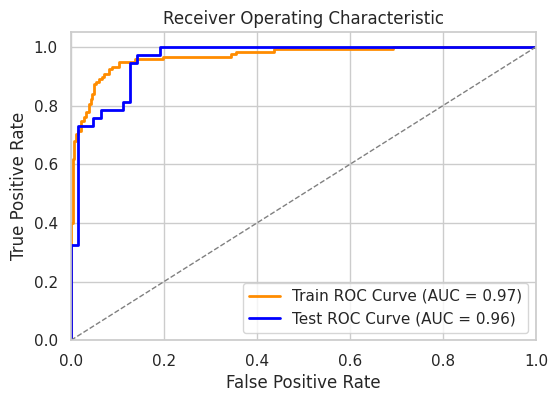

In [680]:
# Get predicted probabilities for both train and test sets
train_probs = naive_bayes_model.predict_proba(X_train)[:, 1]
test_probs = naive_bayes_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for both train and test sets
train_fpr, train_tpr, _ = roc_curve(Y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(Y_test, test_probs)

# Calculate AUC (Area Under the Curve) for both train and test ROC curves
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Plot ROC curves side by side
plt.figure(figsize=(6,4))
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f"Train ROC Curve (AUC = {train_auc:.2f})")
plt.plot(test_fpr, test_tpr, color='blue', lw=2, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### SVM Classification

In [681]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC(random_state=101, probability=True)
# You can adjust the 'kernel' and 'C' parameters as needed

# Train the model
svm_model.fit(X_train, Y_train)

# Make predictions on both the training and testing data
train_predictions = svm_model.predict(X_train)
test_predictions = svm_model.predict(X_test)

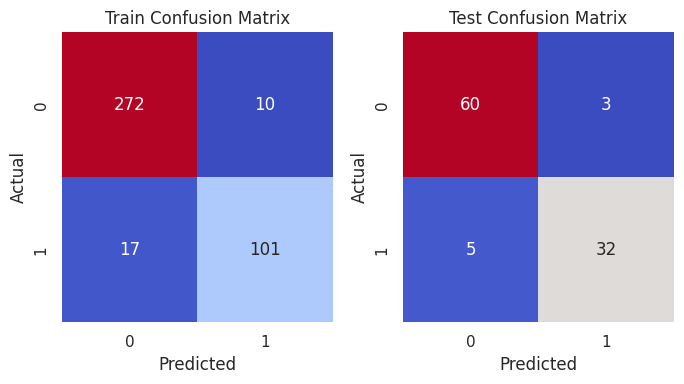

In [682]:
# Calculate confusion matrices for train and test sets
train_cm = confusion_matrix(Y_train, train_predictions)
test_cm = confusion_matrix(Y_test, test_predictions)

# Plot the confusion matrices side by side
plt.figure(figsize=(7,4))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [683]:
# Get classification reports for train and test sets
train_classification_report = classification_report(Y_train, train_predictions)
test_classification_report = classification_report(Y_test, test_predictions)

# Print classification reports side by side
print("Train Classification Report:\n", train_classification_report)
print("\nTest Classification Report:\n", test_classification_report)

Train Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       282
           1       0.91      0.86      0.88       118

    accuracy                           0.93       400
   macro avg       0.93      0.91      0.92       400
weighted avg       0.93      0.93      0.93       400


Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94        63
           1       0.91      0.86      0.89        37

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



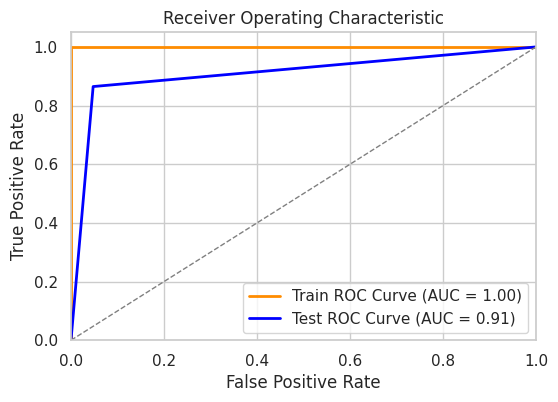

In [684]:
# Get predicted probabilities for both train and test sets
train_probs = classifier.predict_proba(X_train)[:, 1]
test_probs = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve for both train and test sets
train_fpr, train_tpr, _ = roc_curve(Y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(Y_test, test_probs)

# Calculate AUC (Area Under the Curve) for both train and test ROC curves
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Plot ROC curves side by side
plt.figure(figsize=(6,4))
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f"Train ROC Curve (AUC = {train_auc:.2f})")
plt.plot(test_fpr, test_tpr, color='blue', lw=2, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Neural Network

In [685]:
import tensorflow as tf

In [686]:
N, D = X_train.shape

In [687]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [688]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [689]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 16ms/step - loss: 0.5852 - accuracy: 0.6950 - val_loss: 0.4435 - val_accuracy: 0.8900
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 0.4073 - accuracy: 0.8875 - val_loss: 0.3216 - val_accuracy: 0.8800
Epoch 3/20
13/13 [==============================] - 0s 8ms/step - loss: 0.3029 - accuracy: 0.9050 - val_loss: 0.2506 - val_accuracy: 0.9000
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 0.2446 - accuracy: 0.9125 - val_loss: 0.2206 - val_accuracy: 0.9200
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.2092 - accuracy: 0.9225 - val_loss: 0.2046 - val_accuracy: 0.9000
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.1925 - accuracy: 0.9225 - val_loss: 0.1982 - val_accuracy: 0.9000
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.1817 - accuracy: 0.9300 - val_loss: 0.1968 - val_accuracy: 0.9100
Epoch 8/20
13/13 [=

In [690]:
print("Train score:", model.evaluate(X_train, Y_train))
print("Test score:", model.evaluate(X_test, Y_test))

13/13 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.9450
Train score: [0.13909484446048737, 0.9449999928474426]
4/4 [==============================] - 0s 3ms/step - loss: 0.2080 - accuracy: 0.9100
Test score: [0.2080041915178299, 0.9100000262260437]


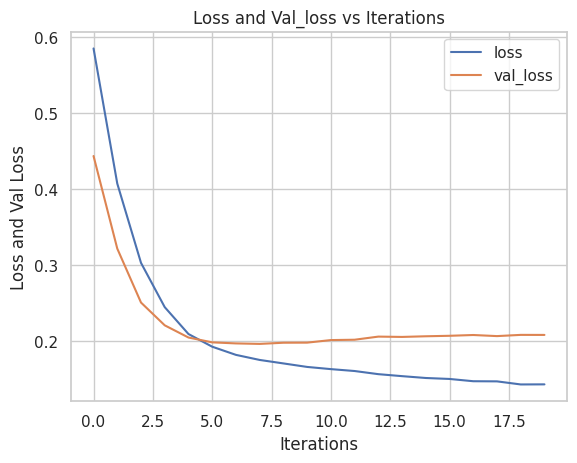

In [691]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Val_loss vs Iterations", loc='center')
plt.ylabel("Loss and Val Loss")
plt.xlabel("Iterations")
plt.legend()
plt.show()

In [692]:
# Make predictions
yhat_train_NN = model.predict(X_train)
yhat_test_NN = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [693]:
yhat_train_NN = np.round(yhat_train_NN).flatten()
yhat_test_NN = np.round(yhat_test_NN).flatten()

In [694]:
print("Manually calculated train accuracy:", np.mean(yhat_train_NN == Y_train))
print("Model output train accuracy:", model.evaluate(X_train, Y_train))

Manually calculated train accuracy: 0.945
13/13 [==============================] - 0s 3ms/step - loss: 0.1391 - accuracy: 0.9450
Model output train accuracy: [0.13909484446048737, 0.9449999928474426]


In [695]:
print("Manually calculated test accuracy:", np.mean(yhat_test_NN == Y_test))
print("Model output test accuracy:", model.evaluate(X_test, Y_test))

Manually calculated test accuracy: 0.91
4/4 [==============================] - 0s 4ms/step - loss: 0.2080 - accuracy: 0.9100
Model output test accuracy: [0.2080041915178299, 0.9100000262260437]


__Observation__
> Considering both train and test results, the logistic regression is performing the best.

### Hyperparameter Tuning

In [696]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.1, 1, 10, 100],
 }
# Create a Logistic Regression model
logreg = LogisticRegression()

# Create GridSearchCV instance
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Score: 0.925


### Implementing the final model on the test data set

In [697]:
logreg_final = LogisticRegression(**best_params)
logreg_final.fit(X_train, Y_train)
y_hat = logreg_final.predict(X_test)

[[60  3]
 [ 4 33]]


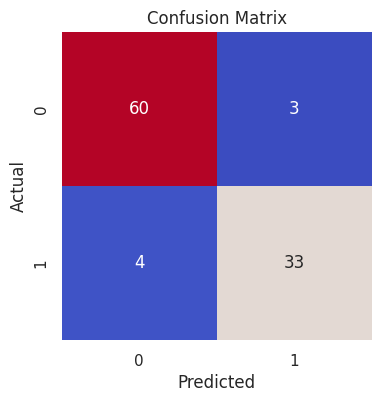

In [698]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_hat)
print(conf_matrix)
# Create a heatmap using Seaborn
plt.figure(figsize=(4,4))  # Set figure size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Display the heatmap
plt.show()

In [699]:
print(classification_report(Y_test, y_hat))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        63
           1       0.92      0.89      0.90        37

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



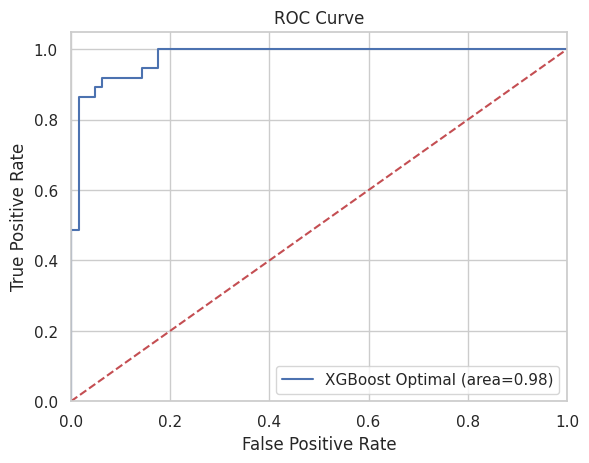

In [700]:
fpr, tpr, thresholds = roc_curve(Y_test, logreg_final.predict_proba(X_test)[:,1])
auc_var=auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,label='XGBoost Optimal (area=%0.2f)' % auc_var)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()